# Cell vocabulary

Cell level *biological* tokens:
- `cell_type`
- `donor_id`?
- `development_stage`
- `disease`
- `sex`
- `tissue`

scRNA-seq *measurement* tokens consist of gene specific measurement (ID and count) and context (assay, library size, temperature, etc):
- gene count `X`
- gene Ensembl ID `var_names`
- `suspension_type`
- `assay`
- `total_mrna_umis`
- `dataset_id`?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from cellarium.ml.data import read_h5ad_file

In [2]:
adata = read_h5ad_file("gs://cellarium-file-system/curriculum/homo_sap_all_diseases/extract_files/extract_0.h5ad")

/home/yordabay/anaconda3/envs/cellarium/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [3]:
adata.obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 734010876 to 1488009346
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   cell_type                                 10000 non-null  category
 1   cas_ingest_id                             10000 non-null  category
 2   assay_ontology_term_id                    10000 non-null  category
 3   cell_type_ontology_term_id                10000 non-null  category
 4   development_stage_ontology_term_id        10000 non-null  category
 5   disease_ontology_term_id                  10000 non-null  category
 6   donor_id                                  10000 non-null  category
 7   is_primary_data                           10000 non-null  bool    
 8   organism_ontology_term_id                 10000 non-null  category
 9   self_reported_ethnicity_ontology_term_id  10000 non-null  category
 10  sex_ontology_t

## `cell_type`

In [6]:
adata.obs["cell_type"].describe(include=object)

count      10000
unique       385
top       neuron
freq         774
Name: cell_type, dtype: object

In [7]:
cell_type_freq = adata.obs["cell_type"].value_counts()
cell_type_freq

cell_type
neuron                             774
glutamatergic neuron               427
CD4-positive, alpha-beta T cell    392
CD8-positive, alpha-beta T cell    358
classical monocyte                 270
                                  ... 
pancreatic endocrine cell            0
glioblast                            0
primary sensory neuron               0
basophil mast progenitor cell        0
endosteal cell                       0
Name: count, Length: 666, dtype: int64

<Axes: title={'center': 'cell_type frequencies'}, xlabel='cell_type'>

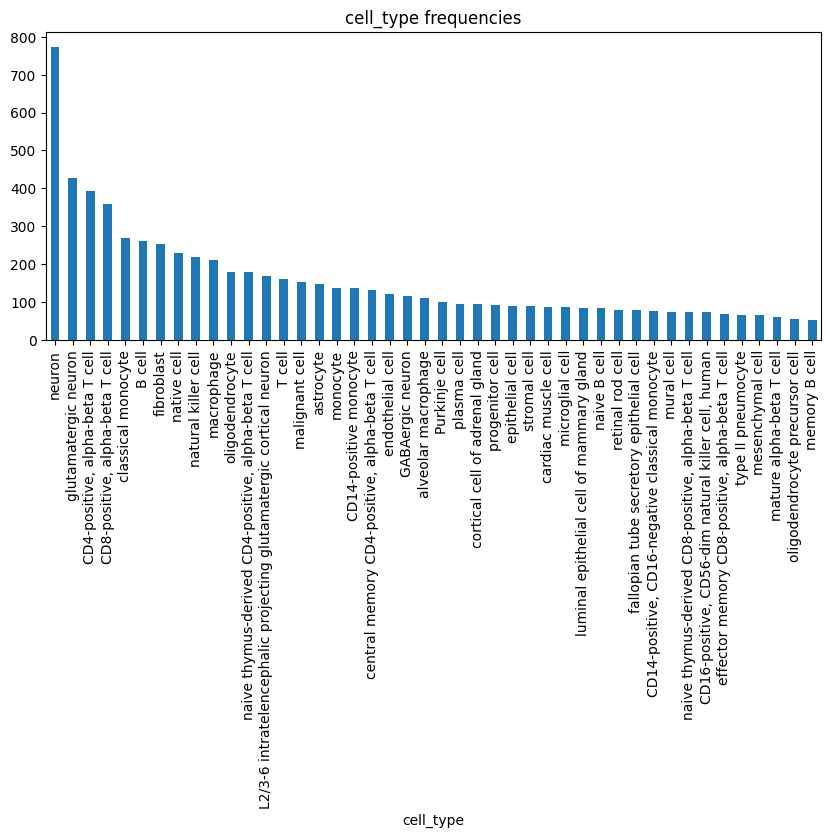

In [8]:
cell_type_freq[cell_type_freq > 50].plot(
    kind="bar",
    figsize=(10, 4),
    title="cell_type frequencies",
    legend=False,
)

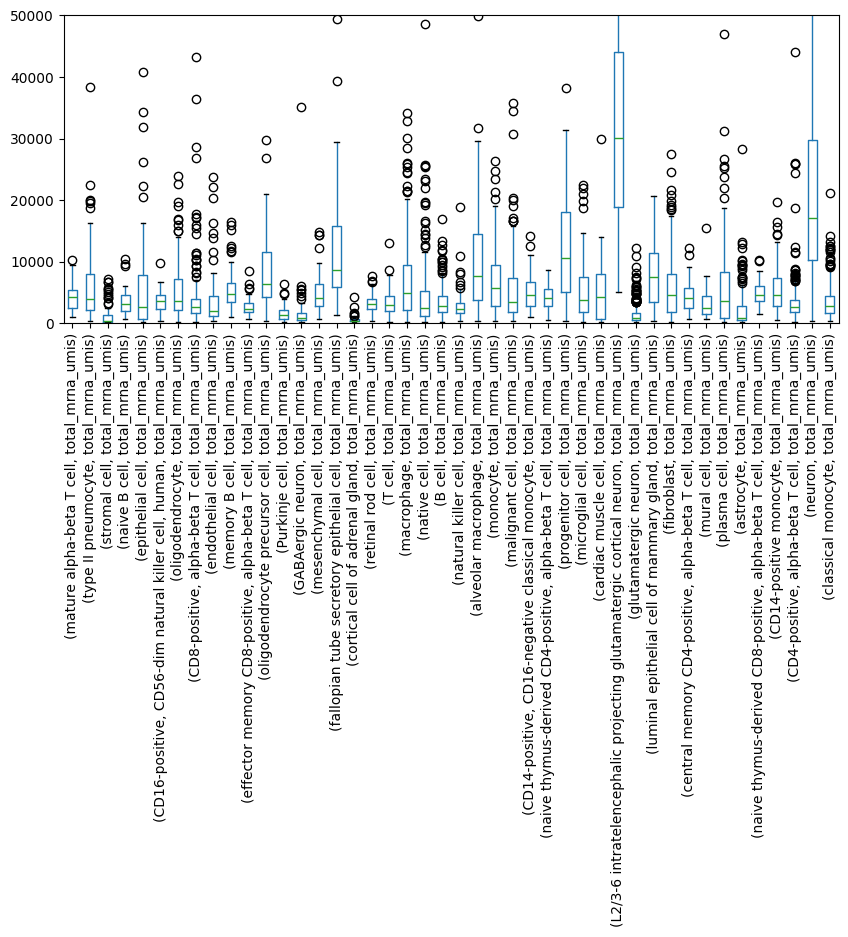

In [9]:
most_freq_cell_types = cell_type_freq[cell_type_freq > 50].index
filtered_df = adata.obs.loc[adata.obs["cell_type"].isin(most_freq_cell_types)]

filtered_df.groupby("cell_type", observed=True).boxplot(
    column="total_mrna_umis",
    figsize=(10, 4),
    rot=90,
    xlabel=None,
    ylabel=None,
    subplots=False,
    grid=False,
)
plt.ylim(0, 5e4)
plt.show()

## `donor_id`

In [56]:
adata.obs["donor_id"].describe(include=object)

count          10000
unique          2837
top       H18.30.002
freq             370
Name: donor_id, dtype: object

In [57]:
donor_id_freq = adata.obs["donor_id"].value_counts()
donor_id_freq

donor_id
H18.30.002    370
H19.30.001    310
H19.30.002    272
H27471        223
H27431        205
             ... 
144_144         1
Hrv51           1
Hrv49           1
Hrv47           1
subject_4       1
Name: count, Length: 2837, dtype: int64

In [69]:
donor_id_freq.index.tolist()

['H18.30.002',
 'H19.30.001',
 'H19.30.002',
 'H27471',
 'H27431',
 'H27474',
 'H27477',
 'H27472',
 'H27634',
 'TSP14',
 'H27464',
 'H27098',
 'D496',
 'H27058',
 'F51',
 '21wpc donor',
 'D2',
 'TSP2',
 'H3',
 '19D015',
 'GW25',
 'H18.30.001',
 'F61',
 'H5',
 'H27552',
 '356C',
 '130064',
 '19D013',
 'GW18_2',
 'H27423',
 'D6',
 'D503',
 'GW16',
 '2',
 'H26547',
 'TSP7',
 'GW18',
 'H27473',
 '110814',
 'P-M004',
 'Donor30',
 'homosapiens_None_2023_None_sikkemalisa_002_d10_1101_2022_03_10_483747D239',
 'D3',
 'ICC_C_0003',
 'C41',
 'H06',
 'GTEX-1HSMQ',
 'SPECTRUM-OV-110',
 '3',
 'H27771',
 'H26350',
 'Donor2',
 'homosapiens_None_2023_None_sikkemalisa_002_d10_1101_2022_03_10_483747NU_CZI01',
 '104689',
 'SPECTRUM-OV-118',
 '120974',
 'D11',
 'H02',
 'HBCA_Donor_38',
 '109829',
 'P2',
 'D4',
 'SPECTRUM-OV-007',
 'TSP4',
 'TSP1',
 'Donor8',
 'SPECTRUM-OV-009',
 'H27772',
 '240day donor',
 'F50',
 'F73',
 'F45',
 'F41',
 'Donor5',
 'Donor1',
 'CV-003',
 'BM3',
 '166301',
 '109373',
 '1',


<Axes: title={'center': 'donor_id frequencies'}, xlabel='donor_id'>

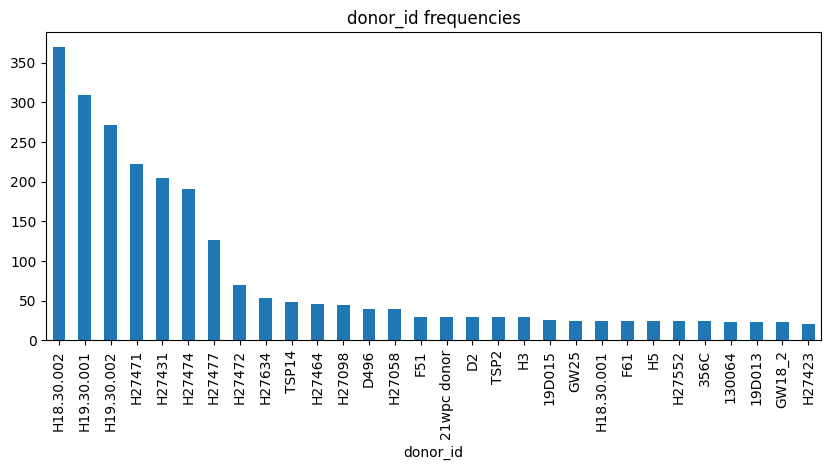

In [60]:
donor_id_freq[donor_id_freq > 20].plot(
    kind="bar",
    figsize=(10, 4),
    title="donor_id frequencies",
    legend=False,
)

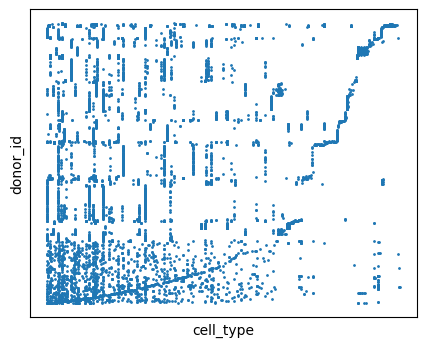

In [66]:
adata.obs.plot.scatter(
    x="cell_type",
    y="donor_id",
    s=1,
    figsize=(5, 4),
)
plt.xticks([])
plt.yticks([])
plt.show()

## `suspension_type`

In [70]:
adata.obs["suspension_type"].describe(include=object)

count     10000
unique        2
top        cell
freq       6754
Name: suspension_type, dtype: object

In [71]:
suspension_type_freq = adata.obs["suspension_type"].value_counts()
suspension_type_freq

suspension_type
cell       6754
nucleus    3246
Name: count, dtype: int64

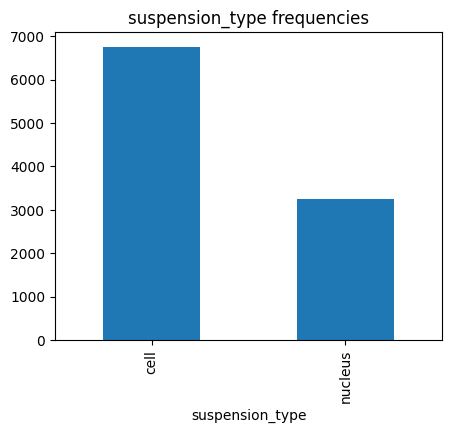

In [73]:
suspension_type_freq.plot(
    kind="bar",
    figsize=(5, 4),
    title="suspension_type frequencies",
    legend=False,
)
plt.show()

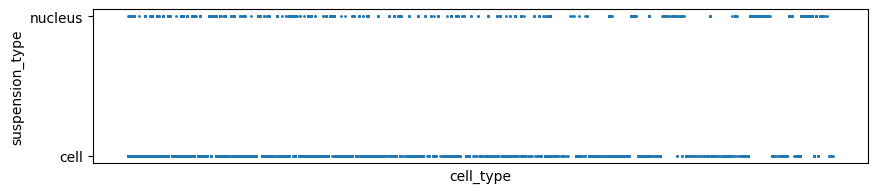

In [76]:
adata.obs.plot.scatter(
    x="cell_type",
    y="suspension_type",
    s=1,
    figsize=(10, 2),
)
plt.xticks([])
plt.show()

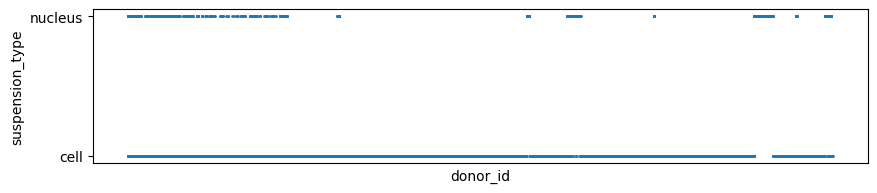

In [77]:
adata.obs.plot.scatter(
    x="donor_id",
    y="suspension_type",
    s=1,
    figsize=(10, 2),
)
plt.xticks([])
plt.show()

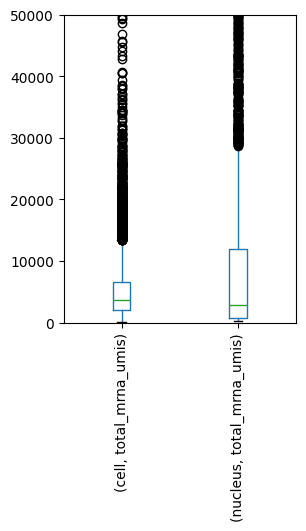

In [14]:
adata.obs.groupby("suspension_type", observed=True).boxplot(
    column="total_mrna_umis",
    figsize=(3, 4),
    rot=90,
    xlabel=None,
    ylabel=None,
    subplots=False,
    grid=False,
)
plt.ylim(0, 5e4)
plt.show()

## `assay`

In [78]:
adata.obs["assay"].describe(include=object)

count         10000
unique           19
top       10x 3' v3
freq           3690
Name: assay, dtype: object

In [79]:
assay_freq = adata.obs["assay"].value_counts()
assay_freq

assay
10x 3' v3                                   3690
10x 3' v2                                   2219
10x 5' v1                                   1198
sci-RNA-seq                                 1182
10x 5' v2                                    820
10x 3' transcription profiling               209
microwell-seq                                183
10x 5' transcription profiling               181
Drop-seq                                      71
BD Rhapsody Whole Transcriptome Analysis      49
10x multiome                                  46
BD Rhapsody Targeted mRNA                     36
single-cell RNA sequencing                    31
Seq-Well                                      29
Smart-seq2                                    24
10x 3' v1                                     14
single cell library construction              10
inDrop                                         7
STRT-seq                                       1
Name: count, dtype: int64

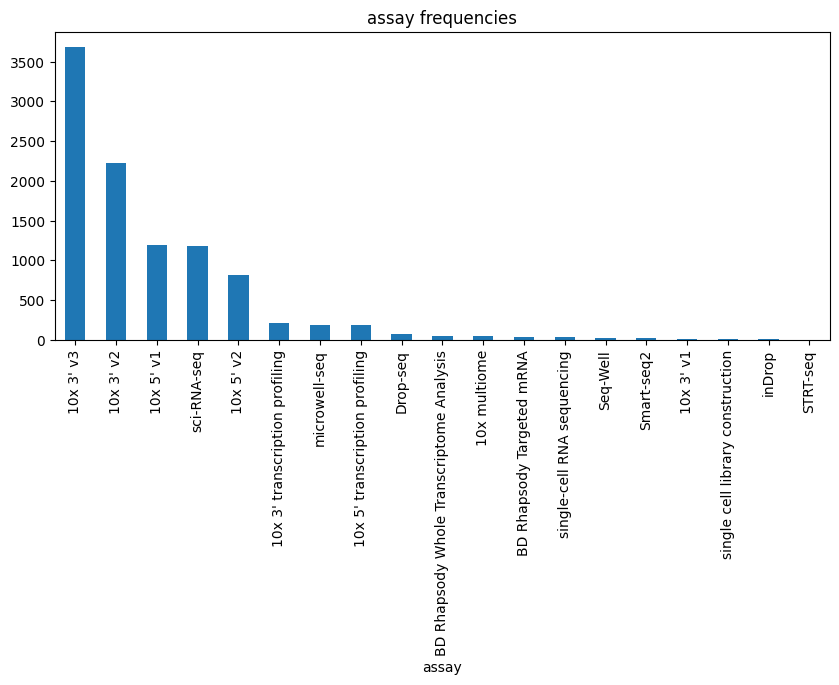

In [80]:
assay_freq.plot(
    kind="bar",
    figsize=(10, 4),
    title="assay frequencies",
    legend=False,
)
plt.show()

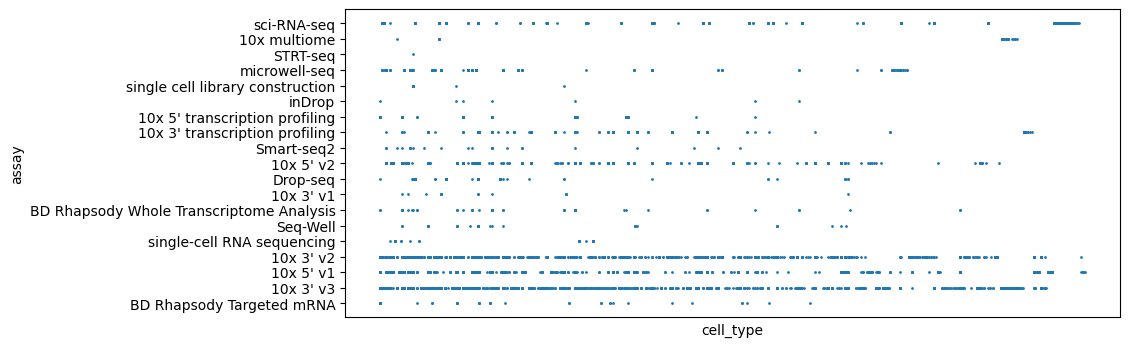

In [81]:
adata.obs.plot.scatter(
    x="cell_type",
    y="assay",
    s=1,
    figsize=(10, 4),
)
plt.xticks([])
plt.show()

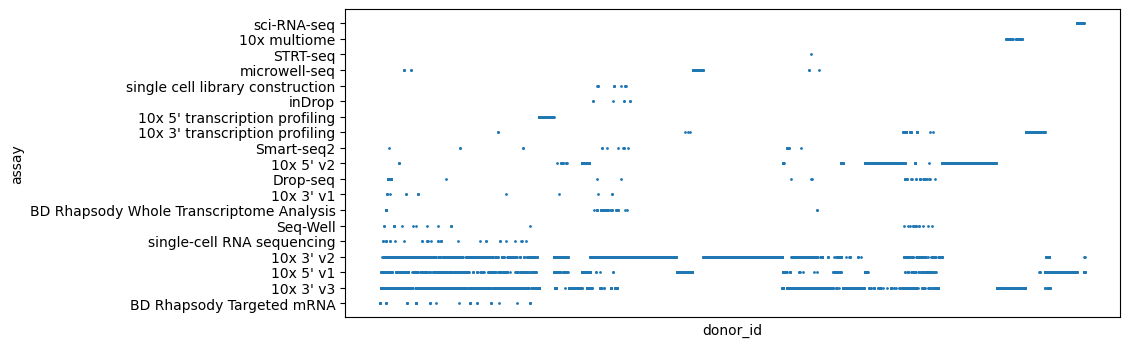

In [82]:
adata.obs.plot.scatter(
    x="donor_id",
    y="assay",
    s=1,
    figsize=(10, 4),
)
plt.xticks([])
plt.show()

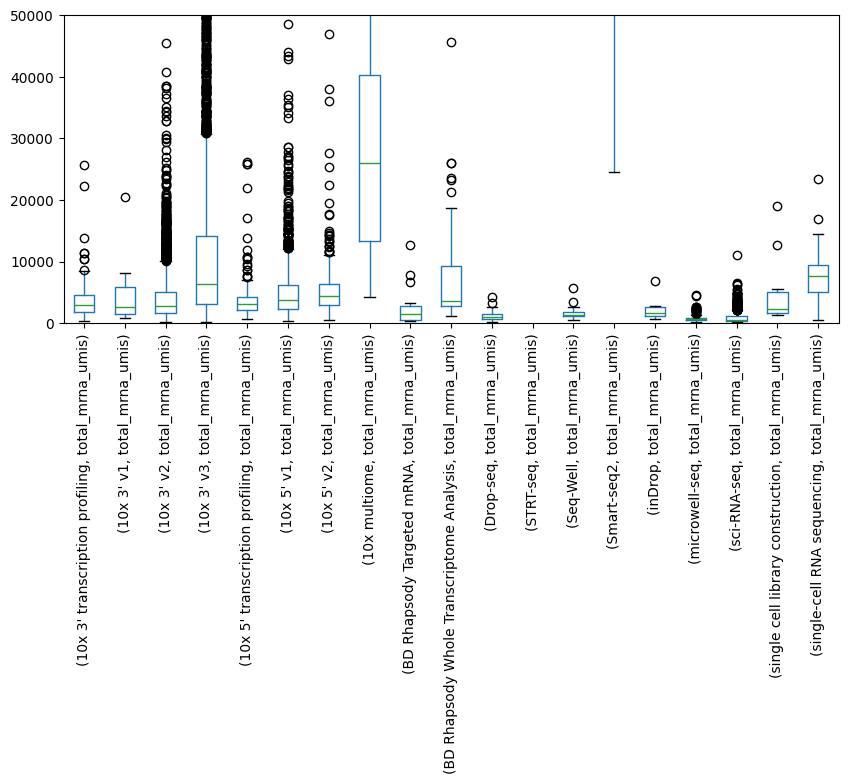

In [12]:
adata.obs.groupby("assay", observed=True).boxplot(
    column="total_mrna_umis",
    figsize=(10, 4),
    rot=90,
    xlabel=None,
    ylabel=None,
    subplots=False,
    grid=False,
)
plt.ylim(0, 5e4)
plt.show()

## `development_stage`

In [84]:
adata.obs["development_stage"].describe(include=object)

count       10000
unique        152
top       unknown
freq          545
Name: development_stage, dtype: object

In [16]:
development_stage_freq = adata.obs["development_stage"].value_counts()
development_stage_freq

development_stage
unknown                                     545
15th week post-fertilization human stage    542
50-year-old human stage                     438
42-year-old human stage                     340
human adult stage                           324
                                           ... 
31st week post-fertilization human stage      1
91-year-old human stage                       1
immature stage                                1
95-year-old human stage                       1
1-month-old human stage                       1
Name: count, Length: 152, dtype: int64

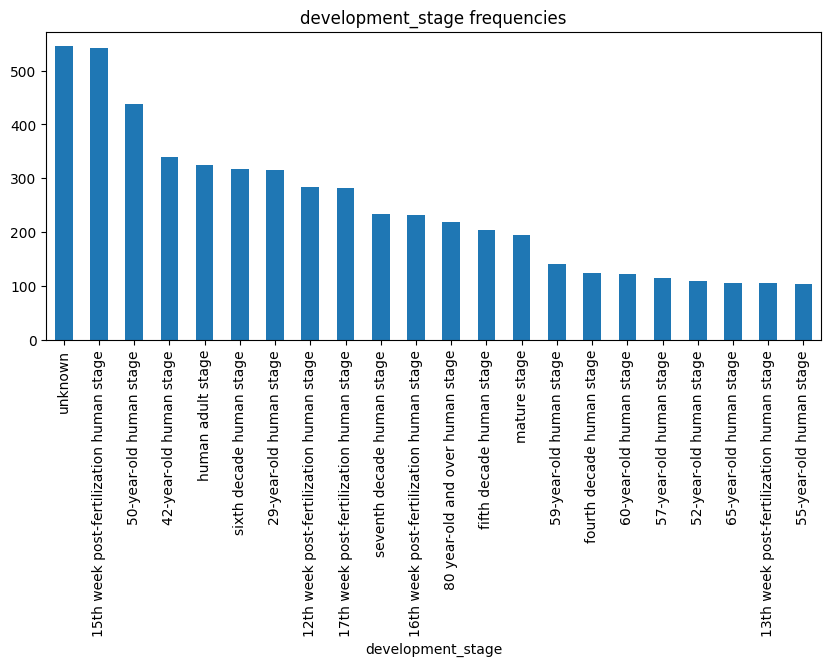

In [88]:
development_stage_freq[development_stage_freq > 100].plot(
    kind="bar",
    figsize=(10, 4),
    title="development_stage frequencies",
    legend=False,
)
plt.show()

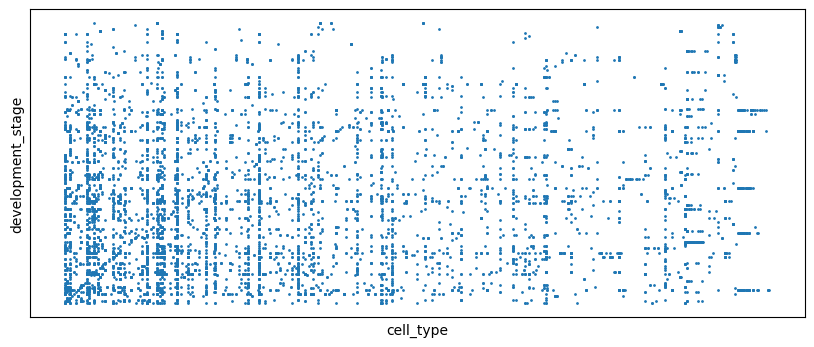

In [89]:
adata.obs.plot.scatter(
    x="cell_type",
    y="development_stage",
    s=1,
    figsize=(10, 4),
)
plt.xticks([])
plt.yticks([])
plt.show()

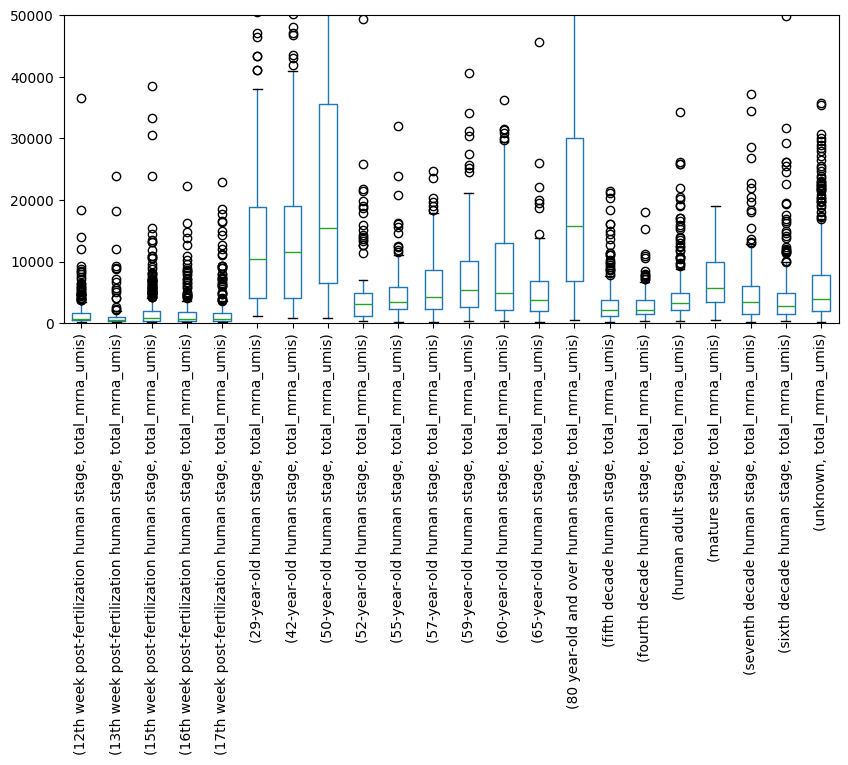

In [17]:
most_freq_dev_stage = development_stage_freq[development_stage_freq > 100].index
filtered_df = adata.obs.loc[adata.obs["development_stage"].isin(most_freq_dev_stage)]

filtered_df.groupby("development_stage", observed=True).boxplot(
    column="total_mrna_umis",
    figsize=(10, 4),
    rot=90,
    xlabel=None,
    ylabel=None,
    subplots=False,
    grid=False,
)
plt.ylim(0, 5e4)
plt.show()

## `disease`

In [90]:
adata.obs["disease"].describe(include=object)

count      10000
unique        60
top       normal
freq        6581
Name: disease, dtype: object

In [18]:
disease_freq = adata.obs["disease"].value_counts()
disease_freq

disease
normal                                             6581
COVID-19                                           1088
glioblastoma                                        319
malignant ovarian serous tumor                      281
lung adenocarcinoma                                 269
systemic lupus erythematosus                        199
Crohn disease                                       171
dilated cardiomyopathy                              147
dementia                                            146
squamous cell lung carcinoma                         57
Alzheimer disease                                    54
myocardial infarction                                50
breast cancer                                        49
B-cell non-Hodgkin lymphoma                          41
non-small cell lung carcinoma                        35
gastric cancer                                       35
follicular lymphoma                                  35
arrhythmogenic right ventricular cardiom

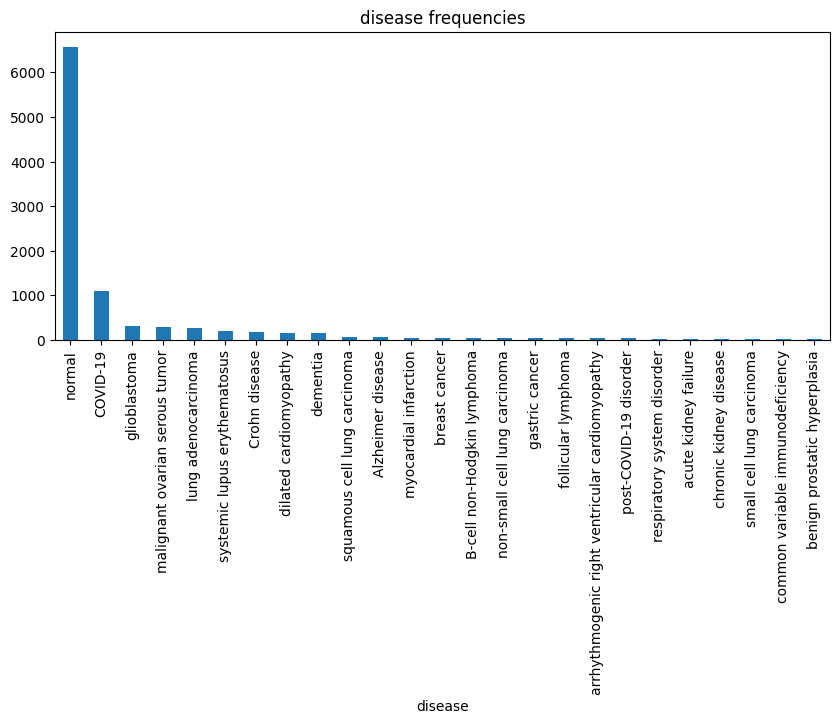

In [92]:
disease_freq[disease_freq > 20].plot(
    kind="bar",
    figsize=(10, 4),
    title="disease frequencies",
    legend=False,
)
plt.show()

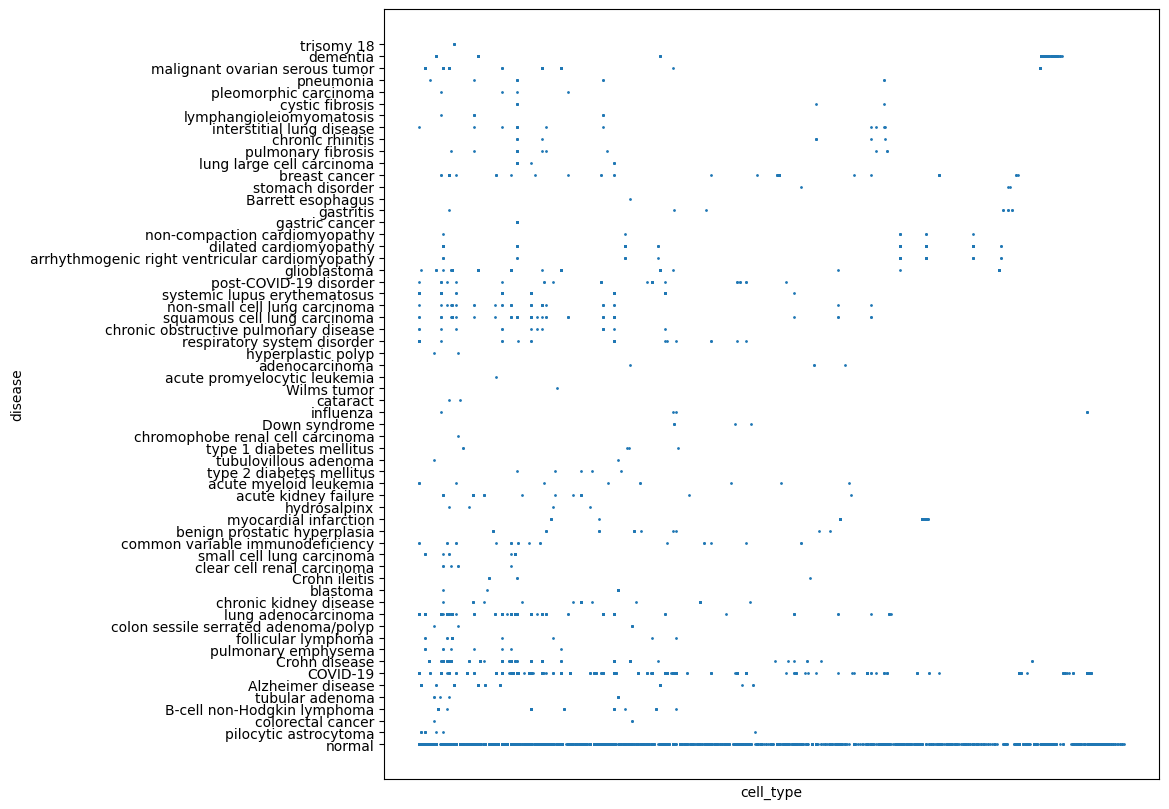

In [96]:
adata.obs.plot.scatter(
    x="cell_type",
    y="disease",
    s=1,
    figsize=(10, 10),
)
plt.xticks([])
plt.show()

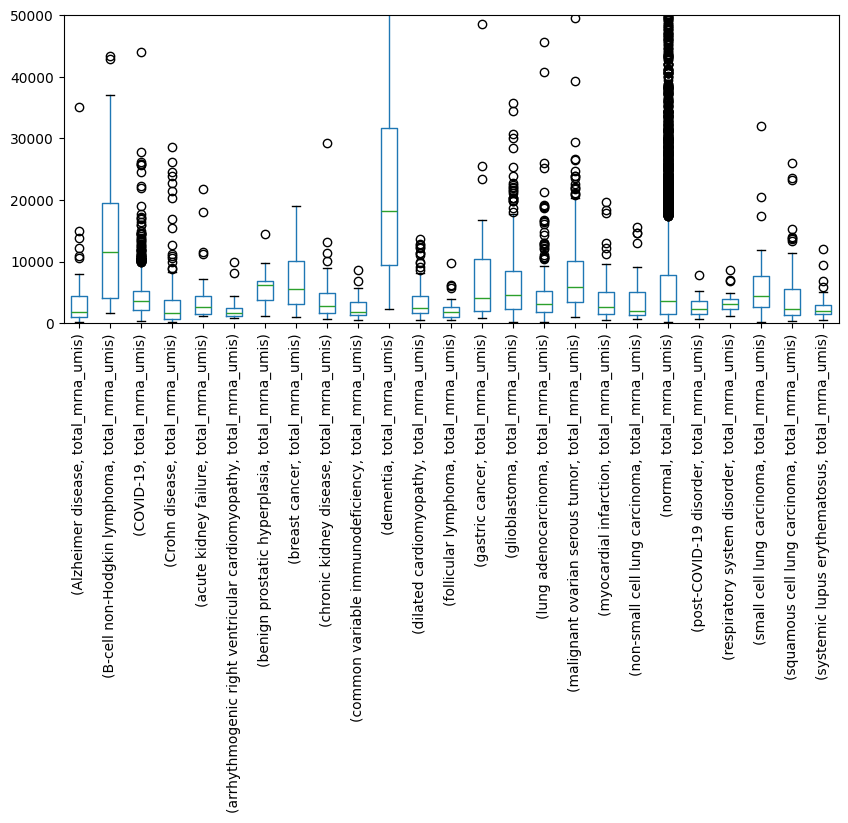

In [19]:
most_freq_disease = disease_freq[disease_freq > 20].index
filtered_df = adata.obs.loc[adata.obs["disease"].isin(most_freq_disease)]

filtered_df.groupby("disease", observed=True).boxplot(
    column="total_mrna_umis",
    figsize=(10, 4),
    rot=90,
    xlabel=None,
    ylabel=None,
    subplots=False,
    grid=False,
)
plt.ylim(0, 5e4)
plt.show()

## `sex`

In [97]:
sex_freq = adata.obs["sex"].value_counts()
sex_freq

sex
male       5057
female     4323
unknown     620
Name: count, dtype: int64

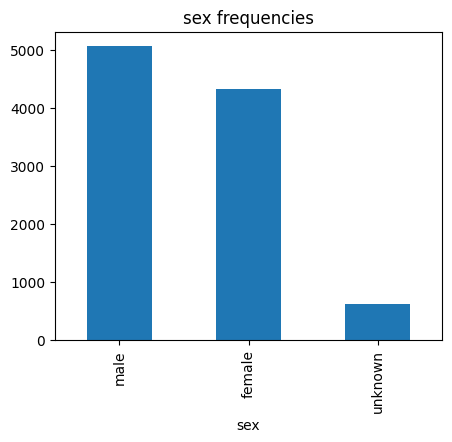

In [98]:
sex_freq.plot(
    kind="bar",
    figsize=(5, 4),
    title="sex frequencies",
    legend=False,
)
plt.show()

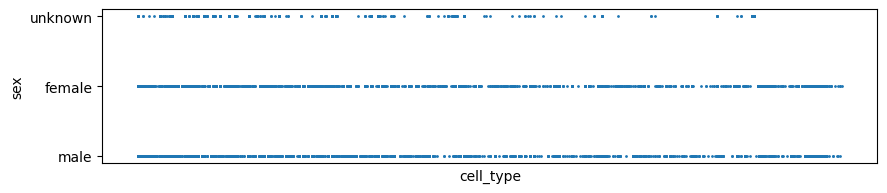

In [101]:
adata.obs.plot.scatter(
    x="cell_type",
    y="sex",
    s=1,
    figsize=(10, 2),
)
plt.xticks([])
plt.show()

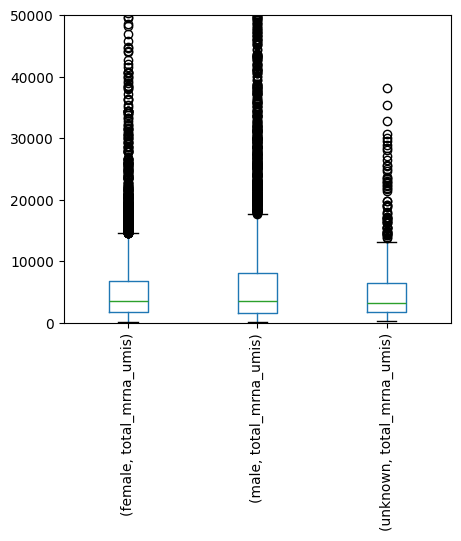

In [13]:
adata.obs.groupby("sex", observed=True).boxplot(
    column="total_mrna_umis",
    figsize=(5, 4),
    rot=90,
    xlabel=None,
    ylabel=None,
    subplots=False,
    grid=False,
)
plt.ylim(0, 5e4)
plt.show()

 ## `tissue`

In [4]:
adata.obs["tissue"].describe(include=object)

count     10000
unique      204
top       blood
freq       2528
Name: tissue, dtype: object

In [5]:
tissue_freq = adata.obs["tissue"].value_counts()
tissue_freq

tissue
blood                       2528
lung                         737
telencephalon                490
breast                       432
cerebral cortex              380
                            ... 
caecum epithelium              1
myometrium                     1
jejunum                        1
bone spine                     1
temporoparietal junction       1
Name: count, Length: 204, dtype: int64

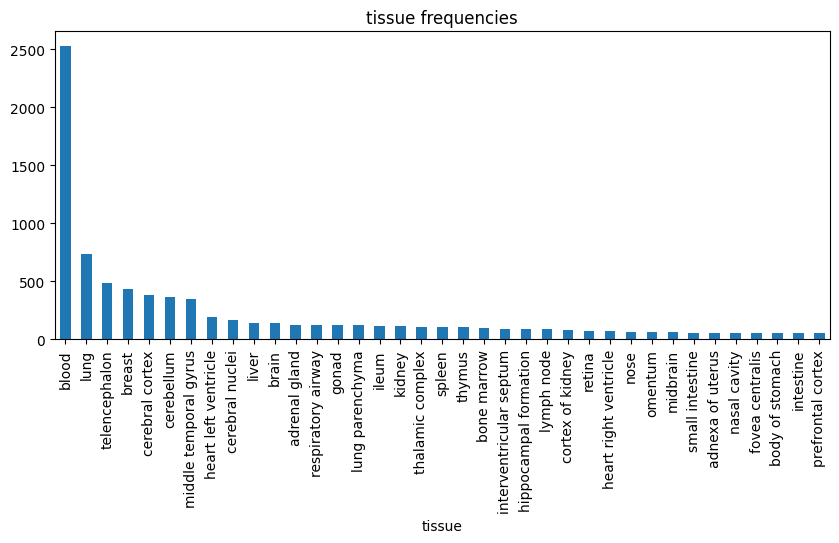

In [10]:
tissue_freq[tissue_freq > 50].plot(
    kind="bar",
    figsize=(10, 4),
    title="tissue frequencies",
    legend=False,
)
plt.show()

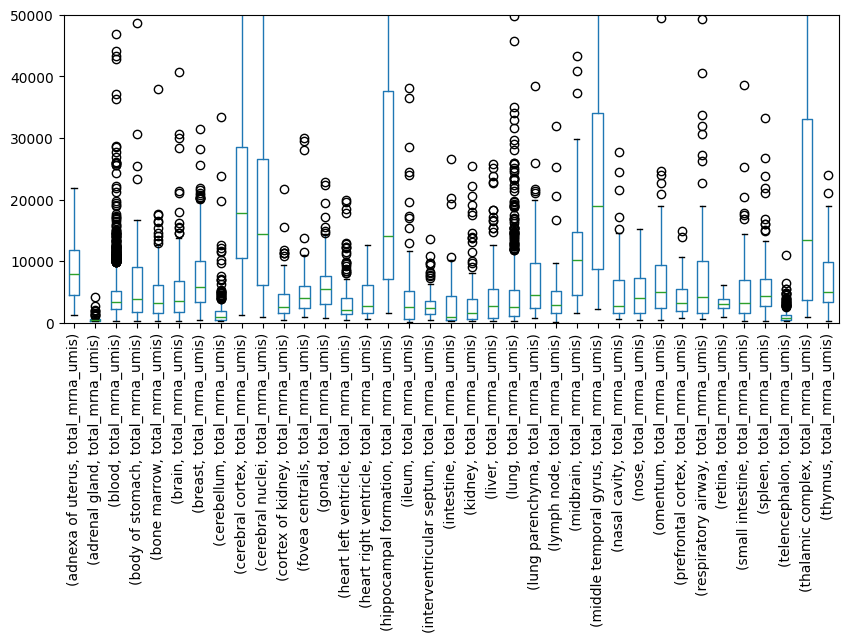

In [11]:
most_freq_tissues = tissue_freq[tissue_freq > 50].index
filtered_df = adata.obs.loc[adata.obs["tissue"].isin(most_freq_tissues)]

filtered_df.groupby("tissue", observed=True).boxplot(
    column="total_mrna_umis",
    figsize=(10, 4),
    rot=90,
    xlabel=None,
    ylabel=None,
    subplots=False,
    grid=False,
)
plt.ylim(0, 5e4)
plt.show()

 ## `total_mrna_umis`

In [4]:
adata.obs["total_mrna_umis"].describe()

count    1.000000e+04
mean     8.834597e+03
std      5.143560e+04
min      1.520000e+02
25%      1.657750e+03
50%      3.543000e+03
75%      7.368000e+03
max      2.161352e+06
Name: total_mrna_umis, dtype: float64

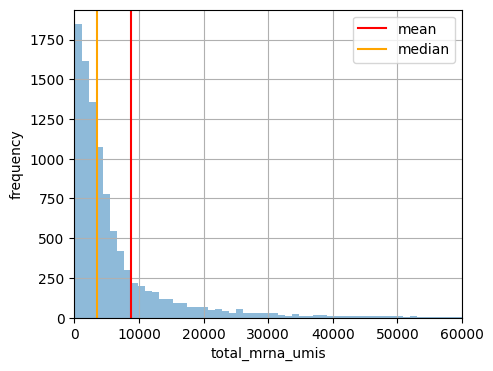

In [8]:
adata.obs["total_mrna_umis"].hist(
    bins=2000,
    figsize=(5, 4),
    alpha=0.5,
)
plt.xlim(0, 6e4)
plt.xlabel("total_mrna_umis")
plt.ylabel("frequency")
plt.axvline(np.mean(adata.obs["total_mrna_umis"]), color="red", label="mean")
plt.axvline(np.median(adata.obs["total_mrna_umis"]), color="orange", label="median")
plt.legend()
plt.show()

## `dataset_id`

In [13]:
adata.obs["dataset_id"].describe(include=object)

count                                    10000
unique                                     262
top       f7c1c579-2dc0-47e2-ba19-8165c5a0e353
freq                                      1182
Name: dataset_id, dtype: object

In [14]:
dataset_id_freq = adata.obs["dataset_id"].value_counts()
dataset_id_freq

dataset_id
f7c1c579-2dc0-47e2-ba19-8165c5a0e353    1182
9dbab10c-118d-496b-966a-67f1763a6b7d     399
3faad104-2ab8-4434-816d-474d8d2641db     372
218acb0f-9f2f-4f76-b90b-15a4b7c7f629     368
c2876b1b-06d8-4d96-a56b-5304f815b99a     351
                                        ... 
ee195b7d-184d-4dfa-9b1c-51a7e601ac11       1
d5452b83-7c3d-4d7c-ab7a-c7fece7196c5       1
4e74d843-8d7a-497a-918a-f079ef141b6d       1
e04daea4-4412-45b5-989e-76a9be070a89       1
c4dd26a8-d956-4bee-a233-44b573f2ce27       1
Name: count, Length: 262, dtype: int64

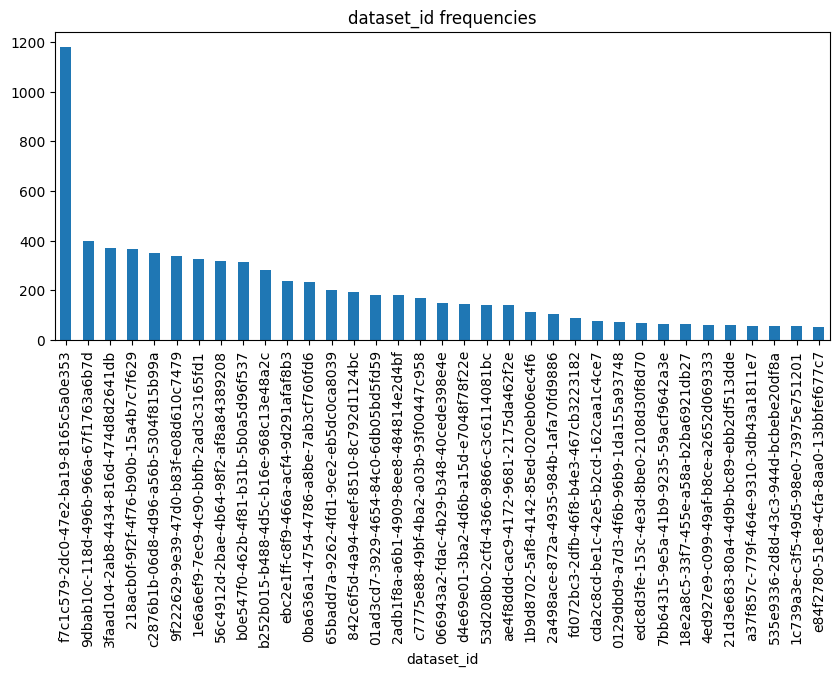

In [15]:
dataset_id_freq[dataset_id_freq > 50].plot(
    kind="bar",
    figsize=(10, 4),
    title="dataset_id frequencies",
    legend=False,
)
plt.show()

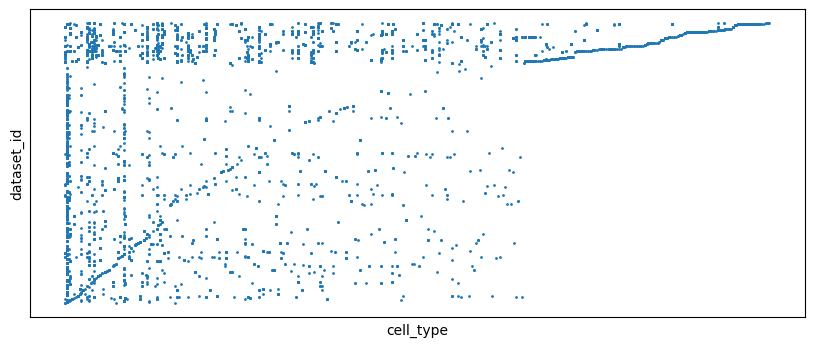

In [17]:
adata.obs.plot.scatter(
    x="cell_type",
    y="dataset_id",
    s=1,
    figsize=(10, 4),
)
plt.xticks([])
plt.yticks([])
plt.show()

/tmp/ipykernel_2999499/1662577740.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_dataset_id_freq = adata.obs.groupby("cell_type")["dataset_id"].nunique().sort_values(ascending=False)


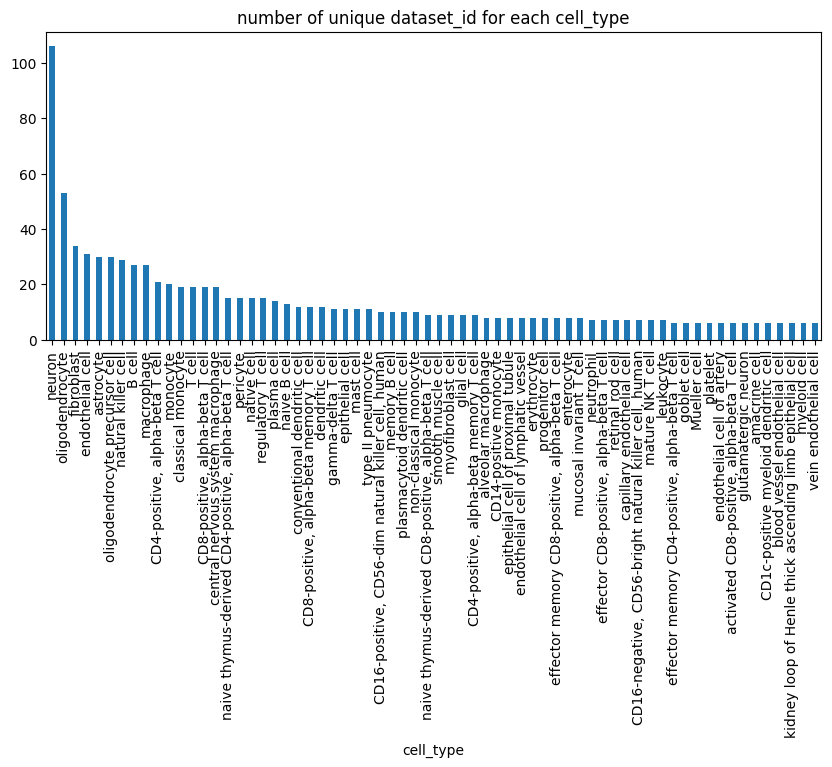

In [26]:
# number of unique dataset_id for each cell_type
unique_dataset_id_freq = adata.obs.groupby("cell_type")["dataset_id"].nunique().sort_values(ascending=False)
unique_dataset_id_freq[unique_dataset_id_freq > 5].plot(
    kind="bar",
    figsize=(10, 4),
    title="number of unique dataset_id for each cell_type",
    legend=False,
)
plt.show()